In [1]:
import pandas as pd

# cargar aceleraciones
df_a = pd.read_csv("accel4.csv")

# renombrar columnas
df_a = df_a.rename(columns={
    "inertial-6286.188861:estLinearAccelX": "ax",
    "inertial-6286.188861:estLinearAccelX:valid": "aXvalid",
    "inertial-6286.188861:estLinearAccelY": "ay",
    "inertial-6286.188861:estLinearAccelY:valid": "aYvalid",
    "inertial-6286.188861:estLinearAccelZ": "az",
    "inertial-6286.188861:estLinearAccelZ:valid": "aZvalid",
})

# quedarnos solo con datos válidos
df_a = df_a[
    (df_a["aXvalid"] == 1) &
    (df_a["aYvalid"] == 1) &
    (df_a["aZvalid"] == 1)
]

# df_a.drop(["aZvalid", "aYvalid", "aXvalid"], axis=1)

df_a["time_comp"] = df_a["Time"]*1e-8
df_a["time_comp"] = df_a["time_comp"].astype(int)
df_a["time_comp"] 

df_a["dt"] = df_a["Time"].diff() * 1e-9
# df_u

new_order = ['Time', 'ax', 'ay', 'az', 'dt']
df_a = df_a[new_order]

df_a

,Time,ax,ay,az,dt
0,1771268220389700352,0.028594,0.016760,0.039987,NaN
1,1771268220489662208,0.029885,0.019369,0.038158,0.099962
2,1771268220589708288,0.046731,0.072430,0.038208,0.100046
3,1771268220689686528,0.033803,0.029890,0.038375,0.099978
4,1771268220789651200,0.026319,0.011331,0.040590,0.099965
...,...,...,...,...,...
101,1771268230489797888,0.020509,0.013417,0.038073,0.100055
102,1771268230589775872,0.020223,0.016575,0.043329,0.099978
103,1771268230689737472,0.020905,0.015012,0.040143,0.099962
104,1771268230789782016,0.020392,0.011346,0.039606,0.100045


In [2]:
import numpy as np


# Inicializar columnas
for col in ["vx", "vy", "vz", "px", "py", "pz"]:
    df_a[col] = 0.0

p = np.zeros(3)
v = np.zeros(3)

# len(df_a)
for k in range(1, len(df_a)):

    dt = df_a.loc[k, "dt"]

    # Si el primer dt es NaN, lo saltamos
    if pd.isna(dt):
        continue

    a = df_a.loc[k, ["ax", "ay", "az"]].values

    # Velocidad
    v = v + a * dt

    # Posición
    p = p + v * dt

    # Guardar en el DataFrame
    df_a.loc[k, ["vx", "vy", "vz"]] = v
    df_a.loc[k, ["px", "py", "pz"]] = p
    
df_a

,Time,ax,ay,az,dt,vx,vy,vz,px,py,pz
0,1771268220389700352,0.028594,0.016760,0.039987,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1771268220489662208,0.029885,0.019369,0.038158,0.099962,0.002987,0.001936,0.003814,0.000299,0.000194,0.000381
2,1771268220589708288,0.046731,0.072430,0.038208,0.100046,0.007663,0.009183,0.007637,0.001065,0.001112,0.001145
3,1771268220689686528,0.033803,0.029890,0.038375,0.099978,0.011042,0.012171,0.011474,0.002169,0.002329,0.002292
4,1771268220789651200,0.026319,0.011331,0.040590,0.099965,0.013673,0.013304,0.015531,0.003536,0.003659,0.003845
...,...,...,...,...,...,...,...,...,...,...,...
101,1771268230489797888,0.020509,0.013417,0.038073,0.100055,0.303775,-0.043053,0.397223,1.731000,-0.338340,2.035147
102,1771268230589775872,0.020223,0.016575,0.043329,0.099978,0.305797,-0.041396,0.401555,1.761573,-0.342479,2.075293
103,1771268230689737472,0.020905,0.015012,0.040143,0.099962,0.307887,-0.039896,0.405568,1.792350,-0.346467,2.115835
104,1771268230789782016,0.020392,0.011346,0.039606,0.100045,0.309927,-0.038760,0.409530,1.823356,-0.350345,2.156806


In [3]:
import matplotlib.pyplot as plt

# Tiempo relativo en segundos
t = (df_a["Time"] - df_a["Time"].iloc[0]) * 1e-9

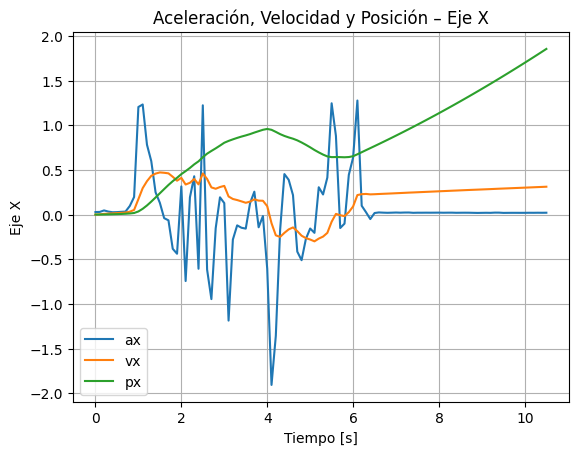

In [4]:
plt.figure()
plt.plot(t, df_a["ax"], label="ax")
plt.plot(t, df_a["vx"], label="vx")
plt.plot(t, df_a["px"], label="px")
plt.xlabel("Tiempo [s]")
plt.ylabel("Eje X")
plt.legend()
plt.grid(True)
plt.title("Aceleración, Velocidad y Posición – Eje X")
plt.show()


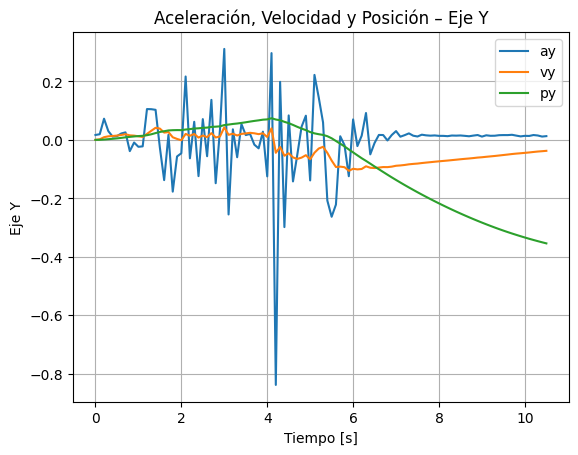

In [5]:
plt.figure()
plt.plot(t, df_a["ay"], label="ay")
plt.plot(t, df_a["vy"], label="vy")
plt.plot(t, df_a["py"], label="py")
plt.xlabel("Tiempo [s]")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.title("Aceleración, Velocidad y Posición – Eje Y")
plt.show()


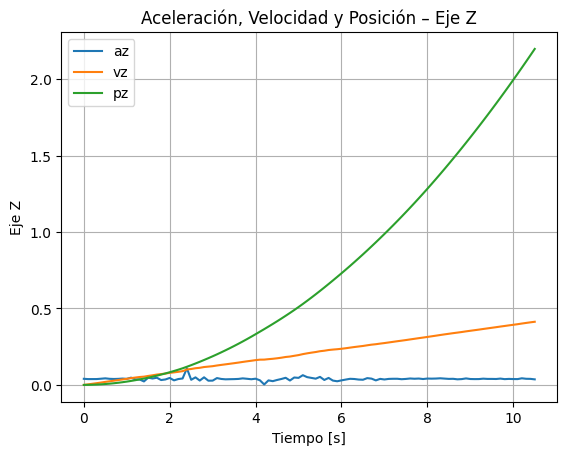

In [6]:
plt.figure()
plt.plot(t, df_a["az"], label="az")
plt.plot(t, df_a["vz"], label="vz")
plt.plot(t, df_a["pz"], label="pz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Eje Z")
plt.legend()
plt.grid(True)
plt.title("Aceleración, Velocidad y Posición – Eje Z")
plt.show()


In [34]:
import pandas as pd

# cargar aceleraciones
df_a = pd.read_csv("accel7.csv")

# renombrar columnas
df_a = df_a.rename(columns={
    "inertial-6286.188861:estLinearAccelX": "ax",
    "inertial-6286.188861:estLinearAccelX:valid": "aXvalid",
    "inertial-6286.188861:estLinearAccelY": "ay",
    "inertial-6286.188861:estLinearAccelY:valid": "aYvalid",
    "inertial-6286.188861:estLinearAccelZ": "az",
    "inertial-6286.188861:estLinearAccelZ:valid": "aZvalid",
})

# quedarnos solo con datos válidos
df_a = df_a[
    (df_a["aXvalid"] == 1) &
    (df_a["aYvalid"] == 1) &
    (df_a["aZvalid"] == 1)
]

# df_a.drop(["aZvalid", "aYvalid", "aXvalid"], axis=1)

df_a["time_comp"] = df_a["Time"]*1e-8
df_a["time_comp"] = df_a["time_comp"].astype(int)
df_a["time_comp"] 

df_a["dt"] = df_a["Time"].diff() * 1e-9
# df_u

new_order = ['Time', 'ax', 'ay', 'az', 'dt']
df_a = df_a[new_order]

df_a

,Time,ax,ay,az,dt
0,1771619747436651264,-0.172709,-0.099982,0.306464,NaN
1,1771619747446646528,-0.083526,0.052249,-0.141221,0.009995
2,1771619747456631552,0.042494,0.054783,0.143061,0.009985
3,1771619747466606848,0.044816,0.078539,-0.102725,0.009975
4,1771619747476572928,-0.034033,0.000710,0.128501,0.009966
...,...,...,...,...,...
9259,1771619840025450240,-0.008459,-0.007568,0.027869,0.009922
9260,1771619840035363328,0.003908,0.011777,0.051747,0.009913
9261,1771619840045266176,-0.012114,0.026375,0.061395,0.009903
9262,1771619840055159296,-0.004589,0.001934,0.050337,0.009893


In [35]:
import numpy as np

dt = df_a['dt'].dropna().values
fs_est = 1 / np.mean(dt)

print("fs estimada:", fs_est, "Hz")

fs estimada: 100.00173714342237 Hz


In [36]:
# import pandas as pd

# # Cargar datos
# data = pd.read_csv("imu_data.csv")

# # Eliminar primera fila (dt = NaN)
# data = data.dropna().reset_index(drop=True)

ax = df_a['ax'].values
ay = df_a['ay'].values
az = df_a['az'].values

accel = np.vstack((ax, ay, az)).T

accel

array([[-0.172709  , -0.09998249,  0.30646434],
       [-0.0835259 ,  0.05224863, -0.14122146],
       [ 0.04249446,  0.05478251,  0.14306147],
       ...,
       [-0.01211396,  0.02637508,  0.06139472],
       [-0.0045894 ,  0.00193371,  0.05033682],
       [-0.00385822,  0.00761637,  0.02180186]], shape=(9264, 3))

In [37]:
import numpy as np
from scipy.signal import butter, sosfilt

fs = 100.0      # Hz
fc = 10.0       # Hz
order = 4

Wn = fc / (fs / 2)

sos = butter(order, Wn, btype='low', output='sos')
print(sos)

accel_filt = sosfilt(sos, accel, axis=0)
accel_filt

[[ 0.00482434  0.00964869  0.00482434  1.         -1.04859958  0.29614036]
 [ 1.          2.          1.          1.         -1.32091343  0.63273879]]


array([[-0.00083321, -0.00048235,  0.00147849],
       [-0.00571008, -0.00282027,  0.00873596],
       [-0.01800815, -0.00718806,  0.02411466],
       ...,
       [ 0.0007181 ,  0.00709538,  0.04582377],
       [-0.00162456,  0.00545497,  0.04478265],
       [-0.00362968,  0.0046373 ,  0.04404712]], shape=(9264, 3))

In [38]:
from scipy.signal import butter, filtfilt

def butter_lowpass(fc, fs, order=4):
    wn = fc / (fs / 2)
    b, a = butter(order, wn, btype='low')
    return b, a

fc = 20  # Hz
b, a = butter_lowpass(fc, fs, order=4)

ax_f = filtfilt(b, a, ax)
ay_f = filtfilt(b, a, ay)
az_f = filtfilt(b, a, az)
ax_f

array([-0.17272273, -0.05700216,  0.01484564, ..., -0.00593916,
       -0.00618639, -0.00385659], shape=(9264,))

In [30]:
ax

array([-0.00189308, -0.00244737, -0.00309074, ..., -0.00534935,
       -0.0093881 , -0.00624436], shape=(10554,))

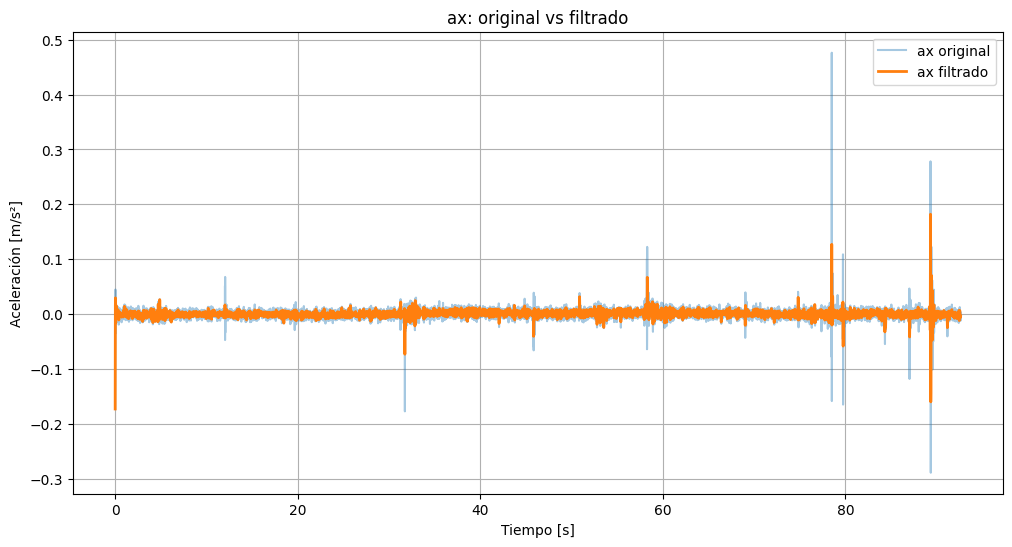

In [39]:
import matplotlib.pyplot as plt

# t = np.cumsum(dt)
N = len(ax)
t = np.arange(N) / fs

plt.figure(figsize=(12,6))
plt.plot(t, ax, label='ax original', alpha=0.4)
plt.plot(t, ax_f, label='ax filtrado', linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/s²]")
plt.title("ax: original vs filtrado")
plt.legend()
plt.grid()
plt.show()

In [24]:
df_a['ax_f'] = ax_f
df_a['ay_f'] = ay_f
df_a['az_f'] = az_f
df_a

,Time,ax,ay,az,dt,ax_f,ay_f,az_f
0,1771616095222958592,-0.003344,0.005360,0.039195,NaN,-0.003344,0.005359,0.039196
1,1771616095232946176,-0.005089,0.006934,0.040875,0.009988,-0.003272,0.005836,0.039706
2,1771616095242923776,-0.001389,0.005670,0.038443,0.009978,-0.002225,0.006964,0.040116
3,1771616095252891648,-0.000046,0.008827,0.041050,0.009968,-0.000383,0.008715,0.040282
4,1771616095262849792,0.001515,0.011049,0.040894,0.009958,0.001181,0.010358,0.040197
...,...,...,...,...,...,...,...,...
8469,1771616179912245248,-0.002818,0.008179,0.042051,0.009928,-0.002488,0.008571,0.043111
8470,1771616179922163456,-0.001501,0.008142,0.043385,0.009918,-0.001843,0.007621,0.042163
8471,1771616179932072192,-0.001150,0.006800,0.039584,0.009909,-0.001295,0.007614,0.040180
8472,1771616179941970944,-0.001409,0.008943,0.038014,0.009899,-0.001087,0.007738,0.038303


In [ ]:
import numpy as np


# Inicializar columnas
for col in ["vx", "vy", "vz", "px", "py", "pz"]:
    df_a[col] = 0.0

p = np.zeros(3)
v = np.zeros(3)

# Umbrales
ACC_TH = 0.1       # m/s^2
GYRO_TH = np.deg2rad(1.0)  # rad/s

# len(df_a)
for k in range(1, len(df_a)):

    dt = df_a.loc[k, "dt"]

    # Si el primer dt es NaN, lo saltamos
    if pd.isna(dt):
        continue

    a = df_a.loc[k, ["ax", "ay", "az"]].values

    # Velocidad
    v = v + a * dt

    # Posición
    p = p + v * dt

    # Detección ZUPT
    # if np.linalg.norm(acc[k]) < ACC_TH and np.linalg.norm(gyro[k]) < GYRO_TH:
    if np.linalg.norm(a) < ACC_TH and np.linalg.norm(g) < GYRO_TH:
        v[k] = np.zeros(3)   # ZUPT duro

    # Guardar en el DataFrame
    df_a.loc[k, ["vx", "vy", "vz"]] = v
    df_a.loc[k, ["px", "py", "pz"]] = p
    
df_a

In [ ]:
import numpy as np

N = len(acc)

v = np.zeros((N, 3))
p = np.zeros((N, 3))

# Umbrales
ACC_TH = 0.1       # m/s^2
GYRO_TH = np.deg2rad(1.0)  # rad/s

for k in range(1, N):
    # Integración normal
    v[k] = v[k-1] + acc[k] * dt
    p[k] = p[k-1] + v[k] * dt

    # Detección ZUPT
    if np.linalg.norm(acc[k]) < ACC_TH and np.linalg.norm(gyro[k]) < GYRO_TH:
        v[k] = np.zeros(3)   # ZUPT duro

In [ ]:
from scipy.signal import sosfilt

# gyro_filt = sosfilt(sos, gyro_raw)
accel_filt = sosfilt(sos, accel_raw)

In [3]:
from scipy.signal import sosfiltfilt

gyro_filt = sosfiltfilt(sos, gyro_raw)

NameError: name 'gyro_raw' is not defined

In [7]:
import pandas as pd

def match_quat_accel():
    # --- cargar cuaterniones ---
    df_q = pd.read_csv("quat3.csv")

    df_q = df_q.rename(columns={
        "inertial-6286.188861:estOrientQuaternion[0-0]": "q0",
        "inertial-6286.188861:estOrientQuaternion[0-1]": "q1",
        "inertial-6286.188861:estOrientQuaternion[0-2]": "q2",
        "inertial-6286.188861:estOrientQuaternion[0-3]": "q3",
        "inertial-6286.188861:estOrientQuaternion:valid": "qValid",
    })

    # Comprobar si es un valor válido
    # df_q = df_q[df_q["inertial-6286.188861:estOrientQuaternion:valid"] == 1]

    # df_q["dt"] = df_q["Time"].diff() * 1e-9
    # print(df_q)

    df_q["time_comp"] = df_q["Time"] * 1e-8
    df_q["time_comp"] = df_q["time_comp"].astype(int)
    df_q["time_comp"]

    # df_q

    df_q["time_comp"] = df_q["Time"] * 1e-8
    df_q["time_comp"] = df_q["time_comp"].astype(int)
    df_q["time_comp"]

    # cargar aceleraciones
    df_a = pd.read_csv("accel3.csv")

    # renombrar columnas
    df_a = df_a.rename(columns={
        "inertial-6286.188861:estLinearAccelX": "ax",
        "inertial-6286.188861:estLinearAccelX:valid": "aXvalid",
        "inertial-6286.188861:estLinearAccelY": "ay",
        "inertial-6286.188861:estLinearAccelY:valid": "aYvalid",
        "inertial-6286.188861:estLinearAccelZ": "az",
        "inertial-6286.188861:estLinearAccelZ:valid": "aZvalid",
    })

    # quedarnos solo con datos válidos
    df_a = df_a[
        (df_a["aXvalid"] == 1) &
        (df_a["aYvalid"] == 1) &
        (df_a["aZvalid"] == 1)
    ]

    # df_a.drop(["aZvalid", "aYvalid", "aXvalid"], axis=1)

    df_a["time_comp"] = df_a["Time"]*1e-8
    df_a["time_comp"] = df_a["time_comp"].astype(int)
    df_a["time_comp"] 

    # df_a

    df_u = pd.merge(
        df_q,
        df_a,
        on="time_comp",
        how="inner"
    )
    # df_u

    df_u = df_u.rename(columns={"Time_x": "time"})
    df_u.drop(["Time_y"], axis=1, inplace=True)
    # df_u

    df_u["dt"] = df_u["time"].diff() * 1e-9
    # df_u

    new_order = ['time', 'q0', 'q1', 'q2', 'q3', 'ax', 'ay', 'az', 'dt']
    df_u = df_u[new_order]
    # print(df_u)
    return df_u

df = match_quat_accel()
# print(df)
df



,time,q0,q1,q2,q3,ax,ay,az,dt
0,1771013550993150208,0.999914,0.001273,0.003427,0.012569,-0.003252,-0.001770,0.045265,NaN
1,1771013551093175296,0.999914,0.001267,0.003429,0.012582,0.005298,0.007200,0.042343,0.100025
2,1771013551193133568,0.999914,0.001262,0.003427,0.012601,0.000224,0.005341,0.040586,0.099958
3,1771013551293115648,0.999914,0.001268,0.003425,0.012619,0.002915,0.003370,0.037068,0.099982
4,1771013551393138176,0.999913,0.001267,0.003430,0.012641,-0.002390,0.007193,0.050009,0.100023
...,...,...,...,...,...,...,...,...,...
298,1771013580891595264,0.992941,-0.000529,0.004224,0.118533,0.000472,0.006305,0.042773,0.100042
299,1771013580991564288,0.992936,-0.000529,0.004222,0.118579,0.001962,0.007706,0.043171,0.099969
300,1771013581091523584,0.992931,-0.000523,0.004209,0.118620,-0.002667,0.005935,0.048977,0.099959
301,1771013581191562752,0.992926,-0.000523,0.004212,0.118657,0.000631,0.007598,0.030819,0.100039


In [8]:


''''''
# # print(len(df))
# for i in range(len(df)):
#     time = df.loc[i, "time"]
#     dt = df.loc[i, "dt"]
#     q  = df.loc[i, ["q0","q1","q2","q3"]].values
#     a_b = df.loc[i, ["ax","ay","az"]].values
#     print(time, dt, q, a_b, "\n")

# print(dt, q, a_b)

# for cada instante k:
#     leer a_body(k)
#     leer q(k)


#     # from scipy.spatial.transform import Rotation as R

#     # r = R.from_quat([qx, qy, qz, q0])
#     # a_nav = r.as_matrix().T @ a_body

#     R = R(q)
#     a_nav = R^T a_body

#     # v = v + a_nav * dt
#     v(k) = v(k-1) + a_nav * dt

#     # p = p + v * dt
#     p(k) = p(k-1) + v(k) * dt

# interp_quaternion()

import numpy as np
from scipy.spatial.transform import Rotation as R

def ins_step(p, v, q, a_body, dt):
    """
    p      : posición inercial actual (3,)
    v      : velocidad inercial actual (3,)
    q      : cuaternión [q0, qx, qy, qz] (AHRS)
    a_body : aceleración lineal en body frame (3,)
    dt     : paso de tiempo [s]

    devuelve:
    p_new, v_new
    """

    # 1) Normalizar cuaternión (seguridad numérica)
    q = q / np.linalg.norm(q)

    # 2) Rotación body → inercial (pasiva)
    r = R.from_quat([q[1], q[2], q[3], q[0]])
    R_nb = r.as_matrix().T   # body → nav

    # 3) Aceleración en marco inercial
    a_nav = R_nb @ a_body

    # 4) Integración aceleración → velocidad
    v_new = v + a_nav * dt

    # 5) Integración velocidad → posición
    p_new = p + v_new * dt

    return p_new, v_new


'''N = 10
dt = 0.1

df = pd.DataFrame({
    "time": np.arange(N) * dt,
    "dt": [dt]*N,
    "q0": [1]*N,
    "q1": [0]*N,
    "q2": [0]*N,
    "q3": [0]*N,
    "ax": [0]*N,
    "ay": [0]*N,
    "az": [0]*N,
})'''


# a = 1.0  # m/s^2
# dt = 0.1
# N = 10

'''df = pd.DataFrame({
    "time": np.arange(N) * dt,
    "dt": [dt]*N,
    "q0": [1]*N,
    "q1": [0]*N,
    "q2": [0]*N,
    "q3": [0]*N,
    "ax": [a]*N,
    "ay": [0]*N,
    "az": [0]*N,
})'''


'''from math import sqrt

q0 = sqrt(2)/2
qz = sqrt(2)/2

df = pd.DataFrame({
    "time": np.arange(N) * dt,
    "dt": [dt]*N,
    "q0": [q0]*N,
    "q1": [0]*N,
    "q2": [0]*N,
    "q3": [qz]*N,
    "ax": [1]*N,   # acelera en X-body
    "ay": [0]*N,
    "az": [0]*N,
})'''


p = np.zeros(3)
v = np.zeros(3)

for k in range(1, len(df)):

    # dt = t[k] - t[k-1]
    time = df.loc[k, "time"]
    dt = df.loc[k, "dt"]
    quat  = df.loc[k, ["q0","q1","q2","q3"]].values
    a_body = df.loc[k, ["ax","ay","az"]].values

    p, v = ins_step(p, v, quat, a_body, dt)

    # print(f"t={time[k]:.3f}  p={p}  v={v}")
    print(f"t={time:.3f}  v={v}  p={p}")

    # print(dt, q, a_b, "\n")

t=1771013551093175296.000  v=[0.00051901 0.00071772 0.00423718]  p=[5.19144376e-05 7.17902702e-05 4.23823845e-04]
t=1771013551193133568.000  v=[0.00052718 0.00126143 0.00829284]  p=[0.00010461 0.00019788 0.00125276]
t=1771013551293115648.000  v=[0.00080179 0.00160067 0.01200005]  p=[0.00018477 0.00035792 0.00245255]
t=1771013551393138176.000  v=[0.00054687 0.00233906 0.01699854]  p=[0.00023947 0.00059188 0.00415279]
t=1771013551493091072.000  v=[0.00049903 0.00260154 0.02125339]  p=[0.00028935 0.00085191 0.00627713]
t=1771013551593056000.000  v=[0.00085242 0.00332709 0.02440964]  p=[0.00037457 0.0011845  0.00871723]
t=1771013551693104640.000  v=[0.00163425 0.00336526 0.02780007]  p=[0.00053807 0.00152119 0.01149859]
t=1771013551793065472.000  v=[0.00128724 0.00417842 0.03227436]  p=[0.00066674 0.00193887 0.01472477]
t=1771013551893013248.000  v=[0.00146497 0.00452224 0.03644216]  p=[0.00081316 0.00239086 0.01836708]
t=1771013551993048832.000  v=[0.00094448 0.0049481  0.03977447]  p=[0.

In [9]:
import pandas as pd
import numpy as np

# --- cargar cuaterniones ---
df_q = pd.read_csv(
    "cuaterniones2.csv",
    parse_dates=["Time"],
    dayfirst=True
)

df_q = df_q.rename(columns={
    "inertial-6286.188861:estOrientQuaternion[0-0]": "q0",
    "inertial-6286.188861:estOrientQuaternion[0-1]": "q1",
    "inertial-6286.188861:estOrientQuaternion[0-2]": "q2",
    "inertial-6286.188861:estOrientQuaternion[0-3]": "q3",
})

df_q = df_q[df_q["inertial-6286.188861:estOrientQuaternion:valid"] == 1]

print(df_q)



# cargar aceleraciones
df_a = pd.read_csv("accel2.csv")

# renombrar columnas
df_a = df_a.rename(columns={
    "inertial-6286.188861:estLinearAccelX": "ax",
    "inertial-6286.188861:estLinearAccelY": "ay",
    "inertial-6286.188861:estLinearAccelZ": "az",
})

# quedarnos solo con datos válidos
df_a = df_a[
    (df_a["inertial-6286.188861:estLinearAccelX:valid"] == 1) &
    (df_a["inertial-6286.188861:estLinearAccelY:valid"] == 1) &
    (df_a["inertial-6286.188861:estLinearAccelZ:valid"] == 1)
]

# # asegurar tipo entero
# df_a["Time"] = df_a["Time"].astype(np.int64)

# # ordenar por tiempo (por seguridad)
# df_a = df_a.sort_values("Time").reset_index(drop=True)

# delta tiempo en segundos
df_a["dt"] = df_a["Time"].diff() * 1e-9

df_a["time_comp"] = df_a["Time"]*1e-8

print(df_a["time_comp"])

df_a = df_a.dropna().reset_index(drop=True)

print(df_a)




# df = pd.merge(
#     df_q,
#     df_a,
#     on="Time",
#     how="inner"
# )

# df = df.sort_values("Time").reset_index(drop=True)
# df["dt"] = df["Time"].diff() * 1e-9
# df = df.dropna().reset_index(drop=True)

# df

                     Time        q0        q1        q2        q3  \
0     1770928206472625500  0.996854 -0.000325  0.003732 -0.079170   
1     1770928206572426496  0.996840 -0.000332  0.003741 -0.079346   
2     1770928206672316928  0.996826 -0.000327  0.003745 -0.079526   
3     1770928206772113920  0.996811 -0.000331  0.003744 -0.079706   
4     1770928206871719424  0.996796 -0.000324  0.003746 -0.079896   
...                   ...       ...       ...       ...       ...   
2041  1770928411854271744  0.994473 -0.002520  0.003743  0.104896   
2042  1770928411954288128  0.994473 -0.002513  0.003757  0.104896   
2043  1770928412054252800  0.994473 -0.002522  0.003757  0.104898   
2044  1770928412154213376  0.994472 -0.002531  0.003756  0.104901   
2045  1770928412254272768  0.994473 -0.002534  0.003766  0.104893   

      inertial-6286.188861:estOrientQuaternion:valid  
0                                                  1  
1                                                  1  
2     

C:\Users\JUANALVA\AppData\Local\Temp\ipykernel_34872\3200391814.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_q = pd.read_csv(


In [10]:
# --- cargar cuaterniones ---
df_q = pd.read_csv("cuaterniones2.csv")

df_q = df_q.rename(columns={
    "inertial-6286.188861:estOrientQuaternion[0-0]": "q0",
    "inertial-6286.188861:estOrientQuaternion[0-1]": "q1",
    "inertial-6286.188861:estOrientQuaternion[0-2]": "q2",
    "inertial-6286.188861:estOrientQuaternion[0-3]": "q3",
    "inertial-6286.188861:estOrientQuaternion:valid": "qValid",
})

# Comprobar si es un valor válido
# df_q = df_q[df_q["inertial-6286.188861:estOrientQuaternion:valid"] == 1]

# df_q["dt"] = df_q["Time"].diff() * 1e-9
# print(df_q)

df_q["time_comp"] = df_q["Time"] * 1e-8
df_q["time_comp"] = df_q["time_comp"].astype(int)
df_q["time_comp"]

df_q

,Time,q0,q1,q2,q3,qValid,time_comp
0,1770928206472625500,0.996854,-0.000325,0.003732,-0.079170,1,17709282064
1,1770928206572426496,0.996840,-0.000332,0.003741,-0.079346,1,17709282065
2,1770928206672316928,0.996826,-0.000327,0.003745,-0.079526,1,17709282066
3,1770928206772113920,0.996811,-0.000331,0.003744,-0.079706,1,17709282067
4,1770928206871719424,0.996796,-0.000324,0.003746,-0.079896,1,17709282068
...,...,...,...,...,...,...,...
2041,1770928411854271744,0.994473,-0.002520,0.003743,0.104896,1,17709284118
2042,1770928411954288128,0.994473,-0.002513,0.003757,0.104896,1,17709284119
2043,1770928412054252800,0.994473,-0.002522,0.003757,0.104898,1,17709284120
2044,1770928412154213376,0.994472,-0.002531,0.003756,0.104901,1,17709284121


In [11]:
df_q["time_comp"] = df_q["Time"] * 1e-8
df_q["time_comp"] = df_q["time_comp"].astype(int)
df_q["time_comp"]

0       17709282064
1       17709282065
2       17709282066
3       17709282067
4       17709282068
           ...     
2041    17709284118
2042    17709284119
2043    17709284120
2044    17709284121
2045    17709284122
Name: time_comp, Length: 2046, dtype: int64

In [12]:
# cargar aceleraciones
df_a = pd.read_csv("accel2.csv")

# renombrar columnas
df_a = df_a.rename(columns={
    "inertial-6286.188861:estLinearAccelX": "ax",
    "inertial-6286.188861:estLinearAccelX:valid": "aXvalid",
    "inertial-6286.188861:estLinearAccelY": "ay",
    "inertial-6286.188861:estLinearAccelY:valid": "aYvalid",
    "inertial-6286.188861:estLinearAccelZ": "az",
    "inertial-6286.188861:estLinearAccelZ:valid": "aZvalid",
})

# quedarnos solo con datos válidos
df_a = df_a[
    (df_a["aXvalid"] == 1) &
    (df_a["aYvalid"] == 1) &
    (df_a["aZvalid"] == 1)
]

# df_a.drop(["aZvalid", "aYvalid", "aXvalid"], axis=1)

df_a["time_comp"] = df_a["Time"]*1e-8
df_a["time_comp"] = df_a["time_comp"].astype(int)
df_a["time_comp"] 

df_a

,Time,az,aZvalid,ax,aXvalid,ay,aYvalid,time_comp
0,1770928248554142720,0.037176,1,0.004059,1,0.013056,1,17709282485
1,1770928248654106624,0.045130,1,-0.000071,1,-0.001095,1,17709282486
2,1770928248754093568,0.042389,1,0.001167,1,0.010090,1,17709282487
3,1770928248854158080,0.037553,1,-0.000152,1,0.007880,1,17709282488
4,1770928248954145536,0.048151,1,-0.001657,1,0.002444,1,17709282489
...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.043091,1,-0.010969,1,0.013900,1,17709283680
1195,1770928368154830336,0.045527,1,-0.000193,1,0.016334,1,17709283681
1196,1770928368254783744,0.047804,1,0.005324,1,0.007992,1,17709283682
1197,1770928368354764032,0.034912,1,-0.002997,1,0.006548,1,17709283683


In [13]:
df_u = pd.merge(
    df_q,
    df_a,
    on="time_comp",
    how="inner"
)
df_u

,Time_x,q0,q1,q2,q3,qValid,time_comp,Time_y,az,aZvalid,ax,aXvalid,ay,aYvalid
0,1770928248554142720,0.998756,-0.000792,0.003767,0.049709,1,17709282485,1770928248554142720,0.037176,1,0.004059,1,0.013056,1
1,1770928248654106624,0.998755,-0.000798,0.003782,0.049727,1,17709282486,1770928248654106624,0.045130,1,-0.000071,1,-0.001095,1
2,1770928248754093568,0.998755,-0.000808,0.003771,0.049741,1,17709282487,1770928248754093568,0.042389,1,0.001167,1,0.010090,1
3,1770928248854158080,0.998754,-0.000813,0.003785,0.049761,1,17709282488,1770928248854158080,0.037553,1,-0.000152,1,0.007880,1
4,1770928248954145536,0.998753,-0.000800,0.003794,0.049772,1,17709282489,1770928248954145536,0.048151,1,-0.001657,1,0.002444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.994503,-0.002292,0.003617,0.104619,1,17709283680,1770928368054809600,0.043091,1,-0.010969,1,0.013900,1
1195,1770928368154830336,0.994503,-0.002289,0.003627,0.104623,1,17709283681,1770928368154830336,0.045527,1,-0.000193,1,0.016334,1
1196,1770928368254783744,0.994502,-0.002294,0.003638,0.104630,1,17709283682,1770928368254783744,0.047804,1,0.005324,1,0.007992,1
1197,1770928368354764032,0.994502,-0.002297,0.003644,0.104632,1,17709283683,1770928368354764032,0.034912,1,-0.002997,1,0.006548,1


In [14]:
df_u = df_u.rename(columns={"Time_x": "time"})
df_u

,time,q0,q1,q2,q3,qValid,time_comp,Time_y,az,aZvalid,ax,aXvalid,ay,aYvalid
0,1770928248554142720,0.998756,-0.000792,0.003767,0.049709,1,17709282485,1770928248554142720,0.037176,1,0.004059,1,0.013056,1
1,1770928248654106624,0.998755,-0.000798,0.003782,0.049727,1,17709282486,1770928248654106624,0.045130,1,-0.000071,1,-0.001095,1
2,1770928248754093568,0.998755,-0.000808,0.003771,0.049741,1,17709282487,1770928248754093568,0.042389,1,0.001167,1,0.010090,1
3,1770928248854158080,0.998754,-0.000813,0.003785,0.049761,1,17709282488,1770928248854158080,0.037553,1,-0.000152,1,0.007880,1
4,1770928248954145536,0.998753,-0.000800,0.003794,0.049772,1,17709282489,1770928248954145536,0.048151,1,-0.001657,1,0.002444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.994503,-0.002292,0.003617,0.104619,1,17709283680,1770928368054809600,0.043091,1,-0.010969,1,0.013900,1
1195,1770928368154830336,0.994503,-0.002289,0.003627,0.104623,1,17709283681,1770928368154830336,0.045527,1,-0.000193,1,0.016334,1
1196,1770928368254783744,0.994502,-0.002294,0.003638,0.104630,1,17709283682,1770928368254783744,0.047804,1,0.005324,1,0.007992,1
1197,1770928368354764032,0.994502,-0.002297,0.003644,0.104632,1,17709283683,1770928368354764032,0.034912,1,-0.002997,1,0.006548,1


In [15]:
# df_u.drop(["Time_y"], axis=1, inplace=True)
df_u

,time,q0,q1,q2,q3,qValid,time_comp,Time_y,az,aZvalid,ax,aXvalid,ay,aYvalid
0,1770928248554142720,0.998756,-0.000792,0.003767,0.049709,1,17709282485,1770928248554142720,0.037176,1,0.004059,1,0.013056,1
1,1770928248654106624,0.998755,-0.000798,0.003782,0.049727,1,17709282486,1770928248654106624,0.045130,1,-0.000071,1,-0.001095,1
2,1770928248754093568,0.998755,-0.000808,0.003771,0.049741,1,17709282487,1770928248754093568,0.042389,1,0.001167,1,0.010090,1
3,1770928248854158080,0.998754,-0.000813,0.003785,0.049761,1,17709282488,1770928248854158080,0.037553,1,-0.000152,1,0.007880,1
4,1770928248954145536,0.998753,-0.000800,0.003794,0.049772,1,17709282489,1770928248954145536,0.048151,1,-0.001657,1,0.002444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.994503,-0.002292,0.003617,0.104619,1,17709283680,1770928368054809600,0.043091,1,-0.010969,1,0.013900,1
1195,1770928368154830336,0.994503,-0.002289,0.003627,0.104623,1,17709283681,1770928368154830336,0.045527,1,-0.000193,1,0.016334,1
1196,1770928368254783744,0.994502,-0.002294,0.003638,0.104630,1,17709283682,1770928368254783744,0.047804,1,0.005324,1,0.007992,1
1197,1770928368354764032,0.994502,-0.002297,0.003644,0.104632,1,17709283683,1770928368354764032,0.034912,1,-0.002997,1,0.006548,1


In [16]:
df_u["dt"] = df_u["time"].diff() * 1e-9
df_u

,time,q0,q1,q2,q3,qValid,time_comp,Time_y,az,aZvalid,ax,aXvalid,ay,aYvalid,dt
0,1770928248554142720,0.998756,-0.000792,0.003767,0.049709,1,17709282485,1770928248554142720,0.037176,1,0.004059,1,0.013056,1,NaN
1,1770928248654106624,0.998755,-0.000798,0.003782,0.049727,1,17709282486,1770928248654106624,0.045130,1,-0.000071,1,-0.001095,1,0.099964
2,1770928248754093568,0.998755,-0.000808,0.003771,0.049741,1,17709282487,1770928248754093568,0.042389,1,0.001167,1,0.010090,1,0.099987
3,1770928248854158080,0.998754,-0.000813,0.003785,0.049761,1,17709282488,1770928248854158080,0.037553,1,-0.000152,1,0.007880,1,0.100065
4,1770928248954145536,0.998753,-0.000800,0.003794,0.049772,1,17709282489,1770928248954145536,0.048151,1,-0.001657,1,0.002444,1,0.099987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.994503,-0.002292,0.003617,0.104619,1,17709283680,1770928368054809600,0.043091,1,-0.010969,1,0.013900,1,0.099937
1195,1770928368154830336,0.994503,-0.002289,0.003627,0.104623,1,17709283681,1770928368154830336,0.045527,1,-0.000193,1,0.016334,1,0.100021
1196,1770928368254783744,0.994502,-0.002294,0.003638,0.104630,1,17709283682,1770928368254783744,0.047804,1,0.005324,1,0.007992,1,0.099953
1197,1770928368354764032,0.994502,-0.002297,0.003644,0.104632,1,17709283683,1770928368354764032,0.034912,1,-0.002997,1,0.006548,1,0.099980


In [17]:
new_order = ['time', 'q0', 'q1', 'q2', 'q3', 'az', 'ax', 'ay', 'dt']
df_u = df_u[new_order]
df_u

,time,q0,q1,q2,q3,az,ax,ay,dt
0,1770928248554142720,0.998756,-0.000792,0.003767,0.049709,0.037176,0.004059,0.013056,NaN
1,1770928248654106624,0.998755,-0.000798,0.003782,0.049727,0.045130,-0.000071,-0.001095,0.099964
2,1770928248754093568,0.998755,-0.000808,0.003771,0.049741,0.042389,0.001167,0.010090,0.099987
3,1770928248854158080,0.998754,-0.000813,0.003785,0.049761,0.037553,-0.000152,0.007880,0.100065
4,1770928248954145536,0.998753,-0.000800,0.003794,0.049772,0.048151,-0.001657,0.002444,0.099987
...,...,...,...,...,...,...,...,...,...
1194,1770928368054809600,0.994503,-0.002292,0.003617,0.104619,0.043091,-0.010969,0.013900,0.099937
1195,1770928368154830336,0.994503,-0.002289,0.003627,0.104623,0.045527,-0.000193,0.016334,0.100021
1196,1770928368254783744,0.994502,-0.002294,0.003638,0.104630,0.047804,0.005324,0.007992,0.099953
1197,1770928368354764032,0.994502,-0.002297,0.003644,0.104632,0.034912,-0.002997,0.006548,0.099980


In [18]:
print(len(df))
for k in range(len(df)):
    # print(k)
    # it = df_u.iloc[0].index
    dt = df_u.loc[k, "dt"]
    q  = df_u.loc[k, ["q0","q1","q2","q3"]].values
    a_b = df_u.loc[k, ["ax","ay","az"]].values
    print(dt, q, a_b, "\n")

# print(dt, q, a_b)

303
nan [ 9.98756e-01 -7.92000e-04  3.76700e-03  4.97090e-02] [0.00405907 0.01305601 0.03717614] 

0.099963904 [ 9.98755e-01 -7.98000e-04  3.78200e-03  4.97270e-02] [-7.11760949e-05 -1.09505956e-03  4.51298244e-02] 

0.09998694400000001 [ 9.98755e-01 -8.08000e-04  3.77100e-03  4.97410e-02] [0.00116668 0.0100897  0.04238898] 

0.10006451200000001 [ 9.98754e-01 -8.13000e-04  3.78500e-03  4.97610e-02] [-0.00015158  0.00788035  0.0375528 ] 

0.099987456 [ 9.98753e-01 -8.00000e-04  3.79400e-03  4.97720e-02] [-0.00165727  0.00244417  0.04815068] 

0.09996057600000001 [ 9.98753e-01 -8.03000e-04  3.80600e-03  4.97800e-02] [0.00314329 0.0010466  0.03393522] 

0.10006476800000001 [ 9.98752e-01 -8.03000e-04  3.81700e-03  4.97970e-02] [ 0.00033207 -0.00188552  0.03791577] 

0.10003891200000001 [ 9.98751e-01 -8.08000e-04  3.81000e-03  4.98140e-02] [ 0.0003574  -0.00110994  0.03949622] 

0.099947008 [ 9.98751e-01 -8.14000e-04  3.80700e-03  4.98210e-02] [-0.00034432  0.00909497  0.03659612] 

0.10004

In [19]:
df.diff(periods=1, axis=0)

,time,q0,q1,q2,q3,ax,ay,az,dt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100025088.0,0.000000e+00,-0.000006,0.000002,0.000013,0.008550,0.008970,-0.002922,NaN
2,99958272.0,0.000000e+00,-0.000005,-0.000002,0.000019,-0.005074,-0.001859,-0.001757,-0.000067
3,99982080.0,0.000000e+00,0.000006,-0.000002,0.000018,0.002691,-0.001970,-0.003518,0.000024
4,100022528.0,-1.000000e-06,-0.000001,0.000005,0.000022,-0.005305,0.003823,0.012941,0.000040
...,...,...,...,...,...,...,...,...,...
298,100041984.0,-5.000000e-06,0.000006,-0.000008,0.000039,0.002637,0.003028,0.014827,0.000028
299,99969024.0,-5.000000e-06,0.000000,-0.000002,0.000046,0.001490,0.001400,0.000398,-0.000073
300,99959296.0,-5.000000e-06,0.000006,-0.000013,0.000041,-0.004629,-0.001770,0.005806,-0.000010
301,100039168.0,-5.000000e-06,0.000000,0.000003,0.000037,0.003298,0.001663,-0.018158,0.000080
